In [459]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import datetime
from scipy.integrate import quad
import scipy.stats
from matplotlib.pyplot import figure
plt.style.use(u'seaborn-deep')

In [460]:
file_location = "/Users/marctheshark/Documents/Ibotta-assessment/ibotta-data.csv"
data = pd.read_csv(file_location,parse_dates = ['offer_redeemed_date'])

In [461]:
print(f"The shape of the data is {data.shape} \n ")
#checking the data types for the data - majority are objects
data.info()
print(" \n Finding the NULLS if ANY")
print(data.isnull().sum())
#checking for NULL 6114 in the Gender Columm

The shape of the data is (57427, 8) 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57427 entries, 0 to 57426
Data columns (total 8 columns):
customer_id            57427 non-null int64
gender                 51313 non-null object
age                    57427 non-null int64
offer_type             57427 non-null object
offer_name             57427 non-null object
category_name          57427 non-null object
offer_redeemed_date    57427 non-null datetime64[ns]
offers_redeemed        57427 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.5+ MB
 
 Finding the NULLS if ANY
customer_id               0
gender                 6114
age                       0
offer_type                0
offer_name                0
category_name             0
offer_redeemed_date       0
offers_redeemed           0
dtype: int64


In [462]:
"""A function add age groups to each observation derived from the age col"""
def add_age_group(this_data):
    mylist = []
    for i in range(len(this_data)):
        age = this_data['age'][i]
        if age <= 17:
            mylist.append("Less than 17")
            
        elif (age >= 18 and age <= 29):
            mylist.append("18-29")
        
        elif (age >= 30 and age <= 39):
            mylist.append("30-39")
        
        elif (age >= 40 and age <= 49):
            mylist.append("40-49")
        
        elif (age >= 50 and age <= 59):
            mylist.append("50-59")
        
        elif (age >= 60 and age <= 69):
            mylist.append("60-69")
            
        elif (age >= 70 and age <= 79):
            mylist.append("70-79")
        
        else:
            mylist.append("80+")
    this_data['age group'] = mylist
    return this_data

In [463]:
"""A Function to add the day of the week col derived from the original timestamp"""
def add_day_of_week(this_data):
    mylist = []
    for i in range(len(this_data)):
        if this_data['offer_redeemed_date'][i].weekday() == 0:
            mylist.append('MON')
            
        elif this_data['offer_redeemed_date'][i].weekday() == 1:
            mylist.append('TUES')
            
        elif this_data['offer_redeemed_date'][i].weekday() == 2:
            mylist.append('WED')
            
        elif this_data['offer_redeemed_date'][i].weekday() == 3:
            mylist.append('THURS')
            
        elif this_data['offer_redeemed_date'][i].weekday() == 4:
            mylist.append('FRI')
            
        elif this_data['offer_redeemed_date'][i].weekday() == 5:
            mylist.append('SAT')
            
        else:
            mylist.append('SUN')
    this_data["Day of Week"] = mylist
    return this_data

In [464]:
data = add_age_group(data)
data = add_day_of_week(data)

In [465]:
data

,customer_id,gender,age,offer_type,offer_name,category_name,offer_redeemed_date,offers_redeemed,age group,Day of Week
0,3108,F,37,grocery - linked loyalty card,Pearls¬Æ Olives To Go!¬Æ,"Condiments, Sauces & Seasonings",2019-08-18,2.0,30-39,SUN
1,3108,F,37,grocery - linked loyalty card,RXBAR¬Æ,Health & Wellness,2019-08-18,2.0,30-39,SUN
2,3108,F,37,grocery - linked loyalty card,RXBAR¬Æ,"Snacks, Cookies, & Chips",2019-08-18,2.0,30-39,SUN
3,3108,F,37,grocery - linked loyalty card,RXBAR¬Æ,Uncategorized,2019-08-18,2.0,30-39,SUN
4,3108,F,37,grocery - receipt upload,Birch Benders¬Æ Pancake and Waffle Mix,Baking,2019-08-24,1.0,30-39,SAT
5,3108,F,37,grocery - receipt upload,Birch Benders¬Æ Pancake and Waffle Mix,Dairy,2019-08-24,1.0,30-39,SAT
6,3108,F,37,grocery - receipt upload,Blue Bunny¬Æ Load'd Sundaes¬Æ Ice Cream Cup,Frozen Foods,2019-09-16,3.0,30-39,MON
7,3108,F,37,grocery - receipt upload,Blue Bunny¬Æ Load'd Sundaes¬Æ Ice Cream Cup,Frozen Foods,2019-09-29,2.0,30-39,SUN
8,3108,F,37,grocery - receipt upload,Blue Diamond¬Æ Almonds & Fruit,Produce,2019-09-25,2.0,30-39,WED
9,3108,F,37,grocery - receipt upload,Blue Diamond¬Æ Almonds & Fruit,Produce,2019-09-29,1.0,30-39,SUN


In [466]:
"""Splitting up the data groups between genders"""
women_data = data[data.gender == 'F']
men_data = data[data.gender == 'M']
unspecified = data[data.gender.isnull()]
unspecified

,customer_id,gender,age,offer_type,offer_name,category_name,offer_redeemed_date,offers_redeemed,age group,Day of Week
1657,164508,NaN,46,grocery - linked loyalty card,[ yellow tail ]¬Æ Wine,Wine,2019-09-25,1.0,40-49,WED
1658,164508,NaN,46,grocery - receipt upload,Blueberry Cheerios‚Ñ¢ & Cheerios‚Ñ¢ Combo,Breakfast & Cereal,2019-08-06,1.0,40-49,TUES
1659,164508,NaN,46,grocery - receipt upload,Cottonelle¬Æ Toilet Paper,Baby & Kids,2019-08-23,1.0,40-49,FRI
1660,164508,NaN,46,grocery - receipt upload,Cottonelle¬Æ Toilet Paper,Health & Wellness,2019-08-23,1.0,40-49,FRI
1661,164508,NaN,46,grocery - receipt upload,Cottonelle¬Æ Toilet Paper,Household Essentials,2019-08-23,1.0,40-49,FRI
1662,164508,NaN,46,grocery - receipt upload,Cottonelle¬Æ Toilet Paper,Uncategorized,2019-08-23,1.0,40-49,FRI
1663,164508,NaN,46,grocery - receipt upload,Kleenex¬Æ Brand Tissue,Household Essentials,2019-08-06,5.0,40-49,TUES
1664,164508,NaN,46,grocery - receipt upload,Kleenex¬Æ Brand Tissue,Uncategorized,2019-08-06,5.0,40-49,TUES
1665,164508,NaN,46,grocery - receipt upload,Member's Mark‚Ñ¢ Paper Towels,Household Essentials,2019-08-10,1.0,40-49,SAT
1666,164508,NaN,46,grocery - receipt upload,Member's Mark‚Ñ¢ Rotisserie Chicken,"Meat, Seafood, & Poultry",2019-08-10,1.0,40-49,SAT


In [467]:
""" A fuction design to take the a column of the data, determine the levels
iterate through them and to find the number of redemptions per level"""
def get_num_redemptions(col_name, data_set):
    col = data_set[col_name]

    # find all of the levels of this currrent column
    unique = set(col)
    
    #empty list for storing data
    new_col_data = []
    
    # for all of the levels
    for levels in unique:
        #print(levels)
        #reseting count for each unique level
        count = 0
        
        # for each row in the col
        for observation in range(len(col)):
            #print('observ',col[observation])
            # setting the variables
            current_observation = col.iloc[observation]
            
            #print(current_observation, 'CO')
            # if the current observation is equal to the current level
            if current_observation == levels:
                
                # lets count the num of redemeption per level
                count += data_set['offers_redeemed'].iloc[observation]
                
        # lets store a list of the levels and their num of redemptions
        new_col_data.append([levels, count])
    return pd.DataFrame(new_col_data, columns = ['Column' , 'Count'])
# lets store the each new_col_data so we have all of the orignal columns of the dataset

In [468]:
age_redemptions = get_num_redemptions('age', women_data).sort_values(by = 'Column')
age_redemptions = age_redemptions.sort_values(by = 'Column')

In [469]:
#creating a dataframe that hold unique values of the customers
unique_data = data[['customer_id','age','gender','age group']]
unique_data = unique_data.drop_duplicates()

In [471]:
"""Grabs all unique customers and to store total number of redemptions"""

l1 = []
l2 = []
l3 = []
#for every unique customer
for i in range(len(unique_data)):
    
    #calling sample_customer as we iterate through the unique customer df
    sample_customer = unique_data.customer_id.iloc[i]
    
    #call our sample data as the data where the customer_id is our sample customers
    sample_data = data.loc[data['customer_id'] == sample_customer]
    
    #lets grab relative data about each customer
    num_redemptions = sample_data.offers_redeemed.sum()
    num_cat_redemptions = sample_data.category_name.value_counts()
    
    num_offer_name = sample_data.offer_name.value_counts()
    
    df = num_cat_redemptions.head(5).to_frame()
    df_offer_name = num_offer_name.head(5).to_frame()
    
    top_name = df.index[0]
    top_value =df.category_name[0]
    
    
    top_offer_name = df_offer_name.index[0]
    top_offer_name_value =df_offer_name.offer_name[0]

    l1.append([top_name,top_value])
    l2.append(num_redemptions)
    l3.append([top_offer_name,top_offer_name_value])
  
    
l1 = pd.DataFrame(l1)
l3 = pd.DataFrame(l3)

unique_data['Number of Redemptions'] = l2
unique_data['Top Category Count'] = l1[1]
unique_data['Top Category'] = l1[0]
unique_data['Top Offer Count'] = l3[1]
unique_data['Top Offer'] = l3[0]



In [472]:
unique_data.sort_values('Top Offer').head()

,customer_id,age,gender,age group,Number of Redemptions,Top Category Count,Top Category,Top Offer Count,Top Offer
859,113708,33,F,30-39,138.000000,1.0,\N,1.0,"Amazon Home, Kitchen, & Garden"
2396,290408,38,F,30-39,220.950000,9.0,\N,3.0,"Amazon Home, Kitchen, & Garden"
592,77108,51,F,50-59,81.000000,1.0,\N,1.0,Amazon Pet Supplies
1317,130208,47,F,40-49,7.250000,2.0,Produce,2.0,Avocados From Mexico
987,114608,40,F,40-49,29.166667,4.0,Uncategorized,3.0,BELVITA Breakfast Biscuits


In [473]:
unique_data = unique_data.sort_values('Number of Redemptions')
unique_data["unique_customers"] = range(0,len(unique_data))
women_levels = unique_data[unique_data.gender == 'F']
men_levels = unique_data[unique_data.gender == 'M']
#unique_data = unique_data.sort_values('offer_redeemed_date')


In [474]:
unique_data.sort_values('Top Category')

,customer_id,age,gender,age group,Number of Redemptions,Top Category Count,Top Category,Top Offer Count,Top Offer,unique_customers
1561,161408,35,F,30-39,42.000000,2.0,Baby & Kids,2.0,Huggies¬Æ¬†Little Movers,2313
800,105108,38,F,30-39,53.000000,3.0,Beauty & Grooming,2.0,Sunbelt¬Æ Bakery Chewy Granola Bars,2432
2272,260408,42,F,40-49,9.000000,2.0,Beauty & Grooming,2.0,Neutrogena¬Æ Face Products,1237
2182,219308,49,F,40-49,35.000000,1.0,Beverages,1.0,Canada Dry¬Æ,2217
2271,255308,34,F,30-39,1.000000,2.0,Beverages,3.0,KeVita¬Æ Master Brew Kombucha¬Æ,139
778,100608,45,F,40-49,1.000000,17.0,Beverages,10.0,Bai¬Æ,158
256,7308,33,F,30-39,5.000000,2.0,Breakfast & Cereal,2.0,all¬Æ Laundry Detergent,733
700,98108,45,F,40-49,21.000000,3.0,Breakfast & Cereal,2.0,Pace¬Æ Salsa or Picante Sauce,1874
1036,118708,55,F,50-59,124.000000,1.0,"Condiments, Sauces & Seasonings",2.0,Miracle Whip,2697
1894,189508,33,F,30-39,81.000000,1.0,"Condiments, Sauces & Seasonings",1.0,Bragg¬Æ Organic Apple Cider Vinegar,2602


In [475]:
d1 = data.drop(['gender','age','offer_type', 'offer_redeemed_date', 'offers_redeemed','age group', 'Day of Week'],axis = 1)

In [476]:
#data used to see the issues in uncategorized
d1

,customer_id,offer_name,category_name
0,3108,Pearls¬Æ Olives To Go!¬Æ,"Condiments, Sauces & Seasonings"
1,3108,RXBAR¬Æ,Health & Wellness
2,3108,RXBAR¬Æ,"Snacks, Cookies, & Chips"
3,3108,RXBAR¬Æ,Uncategorized
4,3108,Birch Benders¬Æ Pancake and Waffle Mix,Baking
5,3108,Birch Benders¬Æ Pancake and Waffle Mix,Dairy
6,3108,Blue Bunny¬Æ Load'd Sundaes¬Æ Ice Cream Cup,Frozen Foods
7,3108,Blue Bunny¬Æ Load'd Sundaes¬Æ Ice Cream Cup,Frozen Foods
8,3108,Blue Diamond¬Æ Almonds & Fruit,Produce
9,3108,Blue Diamond¬Æ Almonds & Fruit,Produce


In [477]:
unique_data.describe()

,customer_id,age,Number of Redemptions,Top Category Count,Top Offer Count,unique_customers
count,2.791000e+03,2791.000000,2791.000000,87.000000,87.000000,2791.000000
mean,1.019408e+07,41.648155,25.688456,4.689655,5.942529,1395.000000
std,5.658062e+06,10.896162,41.160043,5.311922,10.686175,805.836625
min,3.108000e+03,18.000000,0.000000,1.000000,1.000000,0.000000
25%,5.598208e+06,34.000000,4.500000,2.000000,2.000000,697.500000
50%,1.054091e+07,40.000000,11.700000,3.000000,3.000000,1395.000000
75%,1.529781e+07,49.000000,29.000000,5.500000,6.000000,2092.500000
max,1.874031e+07,106.000000,504.000000,34.000000,82.000000,2790.000000


In [478]:
#      ---------------- After this point, it is more or less data analysis and graph generation ---------------- 

In [479]:
def get_bar_chart(col_of_interest,ylabel,title,leg,d1, d2,d3, tails = '',by = ''):
    d1_grab = (get_num_redemptions(col_of_interest, d1))
    d2_grab = (get_num_redemptions(col_of_interest, d2))
    d3_grab = (get_num_redemptions(col_of_interest, d3))
    
    if tails and by:
        d1_sorted= d1_grab.sort_values(by = by).tail(tails)
        d2_sorted = d2_grab.sort_values(by = by).tail(tails)
        d3_sorted = d3_grab.sort_values(by = by).tail(tails)
    
    elif tails:
        d1_sorted= d1_grab.sort_values(by = 'Count').tail(tails)
        d2_sorted = d2_grab.sort_values(by = 'Count').tail(tails)
        d3_sorted = d3_grab.sort_values(by = 'Count').tail(tails)
    elif by:
        d1_sorted= d1_grab.sort_values(by = by)
        d2_sorted = d2_grab.sort_values(by = by)
        d3_sorted = d3_grab.sort_values(by = by)
    else: 
        d1_sorted= d1_grab.sort_values(by = 'Count')
        d2_sorted = d2_grab.sort_values(by = 'Count')
        d3_sorted = d3_grab.sort_values(by = 'Count')
        
    c1 = d1_sorted['Count']
    c2 = d2_sorted['Count']
    c3 = d3_sorted['Count']
    
    
    x1 = d1_sorted['Column']
    x2 = d2_sorted['Column']
    x3 = d3_sorted['Column']
    
    bagged = [d1_grab, d2_grab, d3_grab]
    counting_data = []
    #for all of the datas entered
    for bags in bagged:
        #counting the sum 
        total = bags['Count'].sum()
        #setting counts to be the # of redemeption per level
        counts = bags['Count']
        levels = bags['Column']
        #print(counts)
        #empty list for appending the elements in counts divided by total
        bagged_data = counts / total * 100
        counting_data.append([levels, bagged_data])
    
    """ counting data returns list
    - counting_data[0] is the first data 
    - counting_data[0][0] grabs the levels
    - counting_data[0][1] grabs the percent values]"""
    
    level1 = counting_data[0][1]
    level2 = counting_data[1][1]
    level3 = counting_data[2][1]
    
    p1 = plt.bar(x1, c1,align='center', color = '#FF3A85')
    p2 = plt.bar(x2, c2, align='center', color = '#A5A4A5')
    #p3 = plt.bar(x3, c3, align='center',label = "Unspecified", color = '#F9CCE5')
    
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(leg)
    plt.setp(plt.xticks()[1], rotation=30, ha='right')

    plt.show()


In [480]:
def show_bar(col,all_data,leg,limit = '',by=''):
 
    if limit and by:
        chart = get_bar_chart(col, 'Number of Redemptions',
                              f'Total Number of Redemptions per {col.title()}'
                              , leg, all_data[0], all_data[1], all_data[2], tails = limit, by = by)
    elif limit:
        chart = get_bar_chart(col, 'Number of Redemptions',
                              f'Total Number of Redemptions per {col.title()}'
                              , leg, all_data[0], all_data[1], all_data[2],tails = limit)
    elif by:
        chart = get_bar_chart(col, 'Number of Redemptions',
                              f'Total Number of Redemptions per {col.title()}'
                              , leg, all_data[0], all_data[1], all_data[2], by)
    else:
        chart = get_bar_chart(col, 'Number of Redemptions',
                              f'Total Number of Redemptions per {col.title()}',
                              leg, all_data[0], all_data[1], all_data[2])
    return chart

In [481]:
"""Functions design to plot the Normal Distribtion based on
the two data sets and their respective column up for comparison"""
# Normal Distribution
def get_line(data,col_name):
    norm_values =data[col_name].describe()
    x_min = norm_values[3]
    x_max = norm_values[7]

    mean = norm_values[1]
    std = norm_values[2]

    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean,std)
    return x, y

def plot_norm_dist(d1,d2, col_name,leg):
    x1, y1 = get_line(d1, col_name)
    x2, y2 = get_line(d2, col_name)
    plt.plot(x1, y1, color='grey')
    plt.plot(x2, y2, color='#FF3A85')
    #plt.legend(['Men','Women'])
    plt.legend(leg)
    plt.title(f"User's {col_name.title()} Distribution")
    plt.xlabel(col_name)
    plt.ylabel('Normal Distribution')

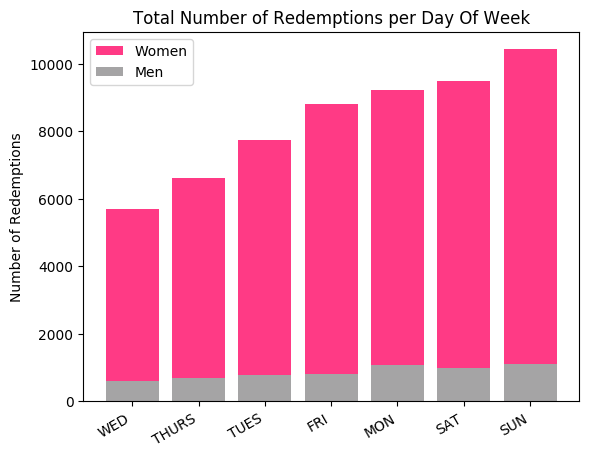

In [482]:
together = [women_data, men_data,unspecified]
legend = ['Women', 'Men']
show_bar('Day of Week', together, leg = legend)
#seems like high volume of redemptions Fri-Mon
#what are the highest redemptions for the weekends? 
#what are the high redemptions on the lower redeeming days?
#is there a difference? 
#are ppl redeeming more in general on the weekends or more volume?
#what is the average item per day?
#mens highest is on Monday

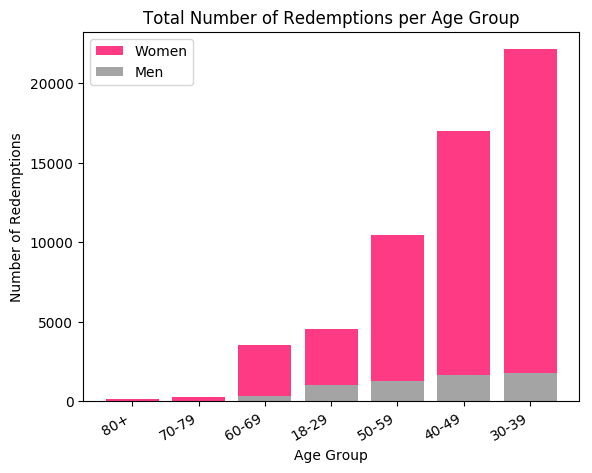

In [483]:
#total number of redeptions per age group
# shows 30-49 use the app greatly across all
#are there differences in 

plt.xlabel('Age Group')
show_bar('age group', together, leg = legend)


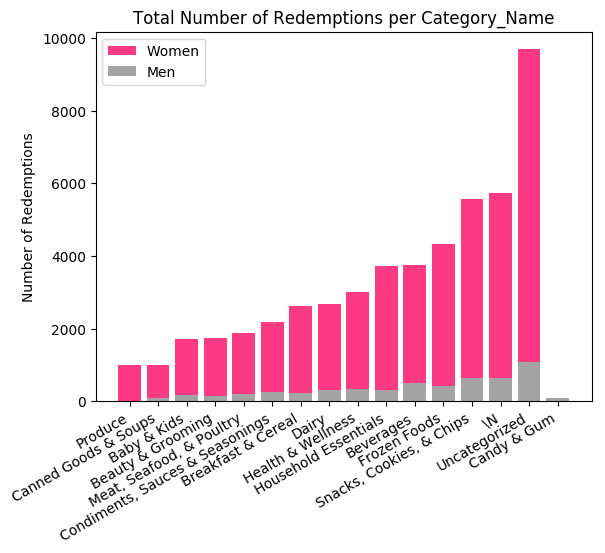

In [484]:
#shows that alot of the items are uncategorized!!
#additonally also having a null values
#otherwise snacks, cookies, and chips has a high lead
# take a look there
show_bar('category_name', together, leg = legend, limit = 15)

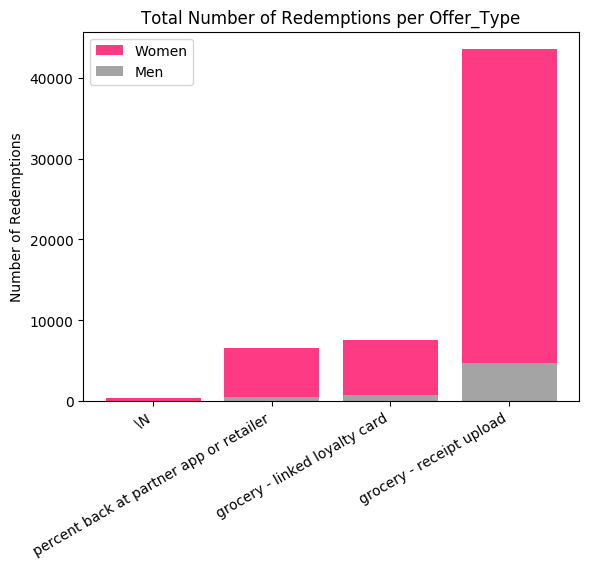

In [485]:
show_bar('offer_type', together, leg = legend)
#Interesting to see that receipt uploads are extremely high, whatre the most common categories in this?
# additionally what the top 5 categories in the other two? Are some the same or difference than the receipt uploads?

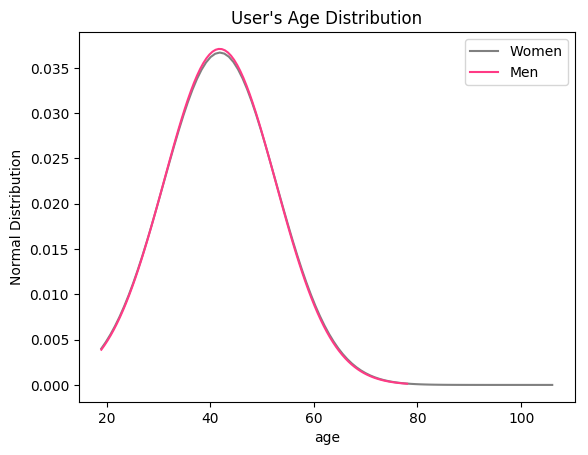

In [486]:
#Plots the age distribution relative to unique users
mylegend = ['Women','Men']
plot_norm_dist(women_levels,men_levels,'age',mylegend)

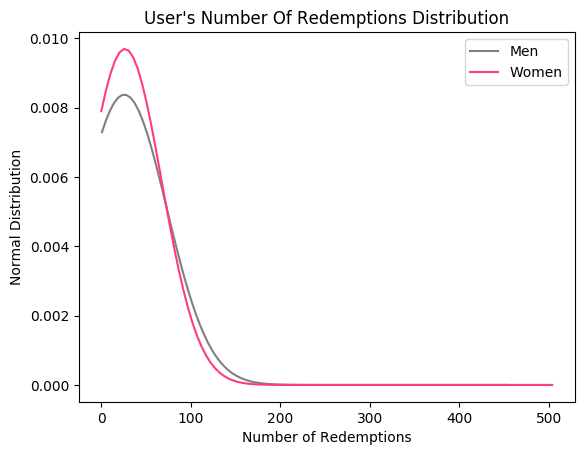

In [487]:
# All age groups and unique users vs Number of Redemptions per time period
plot_norm_dist(men_levels,women_levels,'Number of Redemptions',this_legend)

In [488]:
#now lets check for ppl from 18-29 and 30-39
thirties_men_levels = men_levels[men_levels['age group'] == '30-39']
thirties_women_levels = women_levels[women_levels['age group'] == '30-39']

young_men_levels = men_levels[men_levels['age group'] == '18-29']
young_women_levels = women_levels[women_levels['age group'] == '18-29']

In [489]:
young_men_levels.describe()

,customer_id,age,Number of Redemptions,Top Category Count,Top Offer Count,unique_customers
count,2.200000e+01,22.000000,22.000000,0.0,0.0,22.000000
mean,1.250589e+07,26.681818,45.696970,NaN,NaN,1204.636364
std,5.227965e+06,2.254865,105.487814,NaN,NaN,892.839107
min,9.220080e+05,19.000000,1.000000,NaN,NaN,62.000000
25%,1.031806e+07,26.000000,3.250000,NaN,NaN,551.500000
50%,1.336036e+07,27.000000,6.000000,NaN,NaN,928.000000
75%,1.657431e+07,28.000000,19.750000,NaN,NaN,1799.250000
max,1.848771e+07,29.000000,454.000000,NaN,NaN,2789.000000


In [490]:
young_women_levels.describe()

,customer_id,age,Number of Redemptions,Top Category Count,Top Offer Count,unique_customers
count,2.420000e+02,242.000000,242.000000,4.000000,4.000000,242.000000
mean,1.091818e+07,26.628099,18.899178,3.750000,2.500000,1205.161157
std,5.435047e+06,2.277919,29.116729,3.774917,2.380476,796.399436
min,1.055080e+05,19.000000,0.000000,1.000000,1.000000,1.000000
25%,6.574758e+06,25.000000,3.000000,1.000000,1.000000,530.250000
50%,1.122666e+07,27.000000,8.000000,2.500000,1.500000,1112.000000
75%,1.567378e+07,29.000000,20.375000,5.250000,3.000000,1852.500000
max,1.866411e+07,29.000000,215.000000,9.000000,6.000000,2764.000000


In [491]:
thirties_men_levels.describe()

,customer_id,age,Number of Redemptions,Top Category Count,Top Offer Count,unique_customers
count,9.400000e+01,94.000000,94.000000,2.000000,2.000000,94.000000
mean,1.121353e+07,34.882979,19.128059,11.000000,46.000000,1155.468085
std,5.298923e+06,2.824076,35.696955,4.242641,50.911688,800.695648
min,1.351080e+05,30.000000,1.000000,8.000000,10.000000,49.000000
25%,6.430058e+06,33.000000,3.000000,9.500000,28.000000,463.500000
50%,1.235376e+07,35.000000,7.000000,11.000000,46.000000,1027.500000
75%,1.540356e+07,37.000000,18.500000,12.500000,64.000000,1781.500000
max,1.869641e+07,39.000000,263.333333,14.000000,82.000000,2777.000000


In [492]:
thirties_women_levels.describe()

,customer_id,age,Number of Redemptions,Top Category Count,Top Offer Count,unique_customers
count,8.120000e+02,812.000000,812.000000,30.000000,30.000000,812.000000
mean,9.195956e+06,34.783251,27.231681,5.700000,5.700000,1449.166256
std,5.603486e+06,2.746560,39.756810,7.144566,6.352572,807.677965
min,3.108000e+03,30.000000,0.000000,1.000000,1.000000,2.000000
25%,4.154508e+06,33.000000,5.000000,2.000000,2.000000,742.750000
50%,9.412058e+06,35.000000,13.000000,2.500000,3.000000,1487.000000
75%,1.367346e+07,37.000000,31.000000,6.750000,6.000000,2146.250000
max,1.869131e+07,39.000000,316.551802,34.000000,25.000000,2784.000000


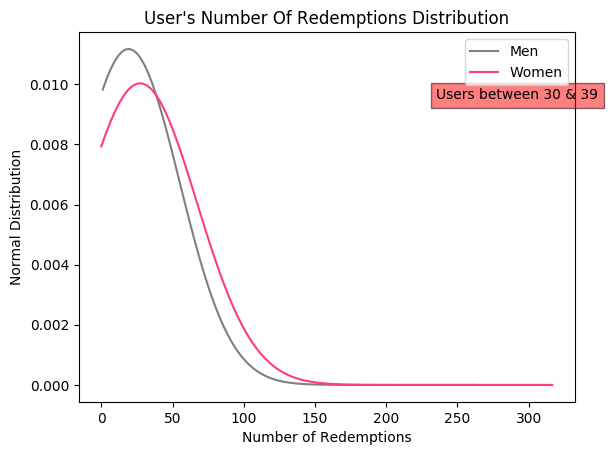

In [493]:
plt.text(235, 0.0095, 'Users between 30 & 39', bbox=dict(facecolor='red', alpha=0.5))
this_legend = ['Men', 'Women']
plot_norm_dist(thirties_men_levels,thirties_women_levels,'Number of Redemptions',this_legend)

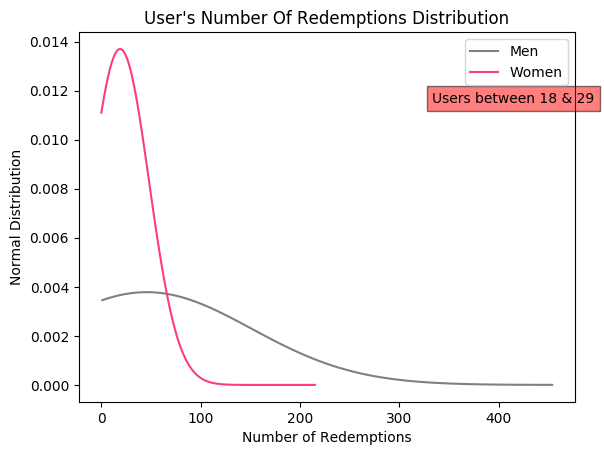

In [494]:
plt.text(333, 0.0115, 'Users between 18 & 29', bbox=dict(facecolor='red', alpha=0.5))
this_legend = ['Men', 'Women']
plot_norm_dist(young_men_levels,young_women_levels,'Number of Redemptions', this_legend)

Text(0.5, 1.0, 'Percentage of Men Vs Women')

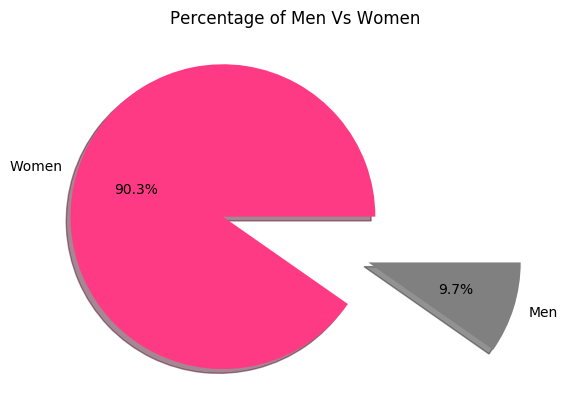

In [495]:
#Making a pie chart for evaluating the Gender Dist
a = unique_data.gender.value_counts()
plt.pie(a , labels = ['Women','Men'] , shadow = True, explode = [0,1],autopct='%1.1f%%',startangle =0, colors = ['#FF3A85','grey'])
plt.axis('equal')
plt.title('Percentage of Men Vs Women')


In [496]:
#if I need this for later
#unique_data = unique_data.drop('unique_customers', axis = 1)

In [497]:
"""These functions take in data the column of interested and specified level for data extraction
The second function deals with multiple list of data to compare in the future"""

def my_type_only(data,col_of_interest, level_of_interest):
    new_data = data[data[col_of_interest] == level_of_interest]
    return new_data

def get_seperate_data(data_list,col_of_interest, level_of_interest):
    uploads =[]
    for i in range(len(data_list)):
        current_data = my_type_only(data_list[i],col_of_interest, level_of_interest)
        uploads.append(current_data)
    return uploads

In [498]:
together = [women_data, men_data,data]

"""Comparing receipt uploads and loyalty cards"""
data_receipt_uploads = my_type_only(data,'offer_type','grocery - receipt upload')
data_loyalty_card = my_type_only(data,'offer_type','grocery - linked loyalty card')
offer_types = [data_receipt_uploads,data_loyalty_card,data ]
offer_type_data = get_seperate_data(together,'offer_type','grocery - receipt upload')
loyalty_card_data = get_seperate_data(together,'offer_type','grocery - linked loyalty card')

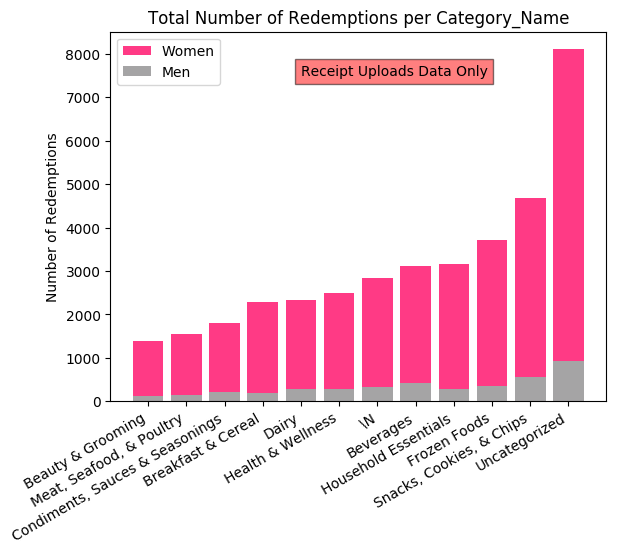

In [499]:
plt.text(4, 7500, 'Receipt Uploads Data Only', bbox=dict(facecolor='red', alpha=0.5))
show_bar('category_name', offer_type_data, legend, 12)

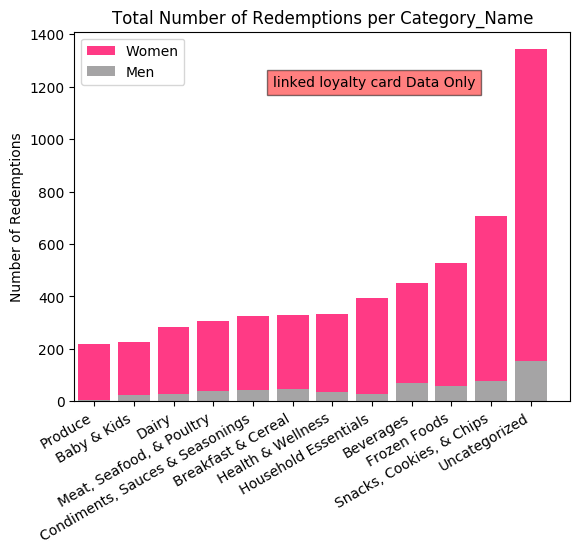

In [500]:
x = 22.5
plt.text(x + 5, 1200, 'linked loyalty card Data Only', bbox=dict(facecolor='red', alpha=0.5))
plt.xlim(x, 35)
show_bar('category_name', loyalty_card_data, leg = legend)


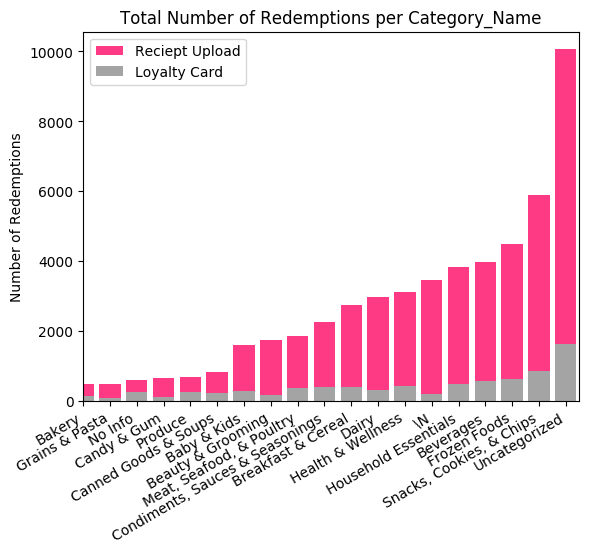

In [501]:
legend =['Reciept Upload', 'Loyalty Card']
plt.xlim(10, 28.5)
show_bar('category_name', offer_types, leg = legend)

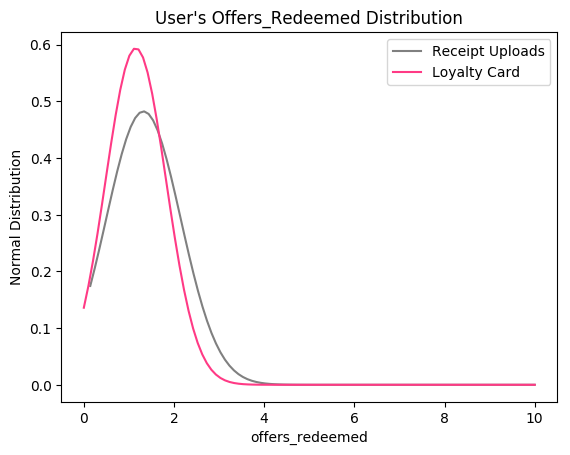

In [502]:
plot_norm_dist(data_receipt_uploads,data_loyalty_card,'offers_redeemed', ['Receipt Uploads','Loyalty Card'])

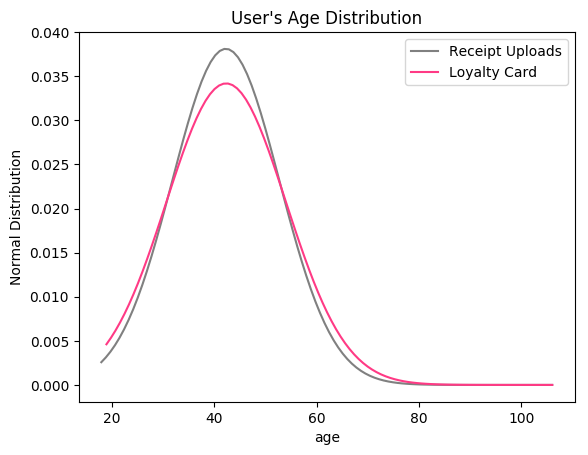

In [503]:
plot_norm_dist(data_receipt_uploads,data_loyalty_card,'age', ['Receipt Uploads','Loyalty Card'])

In [504]:
# Getting the unique number of redemptions per unique day
unique_days = get_num_redemptions('offer_redeemed_date', data).sort_values(by = 'Column')
unique_days_men =  get_num_redemptions('offer_redeemed_date', men_data).sort_values(by = 'Column')
unique_days_women =  get_num_redemptions('offer_redeemed_date', women_data).sort_values(by = 'Column')


In [505]:
unique_days['Column']= pd.to_datetime(unique_days['Column'])
unique_days = unique_days.rename(columns = {'Column' :'offer_redeemed_date'})
unique_days = add_day_of_week(unique_days)
unique_days['Day'] = range(0,len(unique_days))
unique_days_men['Day'] = range(0,len(unique_days_men))
unique_days_women['Day'] = range(0,len(unique_days_women))
unique_days_sat = unique_days[unique_days['Day of Week'] == 'SAT']
unique_days_sun = unique_days[unique_days['Day of Week'] == 'SUN']
unique_days_mon = unique_days[unique_days['Day of Week'] == 'MON']
unique_days_fri = unique_days[unique_days['Day of Week'] == 'FRI']
unique_days_wed = unique_days[unique_days['Day of Week'] == 'WED']


Text(0.5, 1.0, 'Number of Redemptions in Time Series')

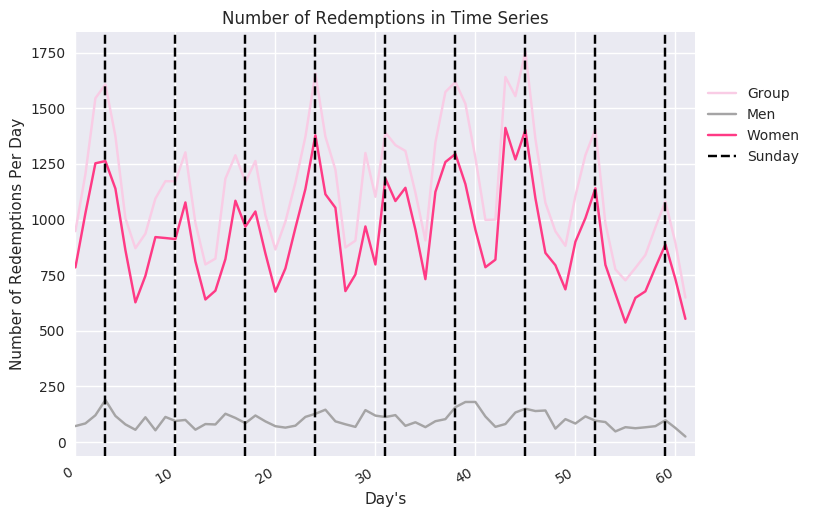

In [506]:
plt.style.use(u'seaborn')
fig, ax = plt.subplots()

plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.plot(unique_days.Day, unique_days.Count, label = 'Group', color = '#F9CCE5')
plt.plot(unique_days_men.Day, unique_days_men.Count, label = 'Men', color = '#A5A4A5')
plt.plot(unique_days_women.Day, unique_days_women.Count, label = 'Women',color = '#FF3A85')
#plt.scatter(unique_days_sat.Day, unique_days_sat.Count, marker = '^', label = 'Saturday')
#plt.scatter(unique_days_sun.Day, unique_days_sun.Count, marker = '^', label = 'Sunday')
#plt.scatter(unique_days_mon.Day, unique_days_mon.Count, marker = '^', label = 'Monday')
#plt.scatter(unique_days_fri.Day, unique_days_fri.Count, marker = '^', label = 'Friday')
#plt.scatter(unique_days_wed.Day, unique_days_wed.Count, marker = 'o', label = 'Wednesday')
count = 0
for i in range(len(unique_days.Day)):
    # at i=0 we start on a thursday
    if i == 0:
        ax.axvline(line, color = 'black', label = 'Sunday', ls = '--')
        #ax.axvline(line+3, color = 'red', label = 'Wednesday', ls = '--')
    line = i* 7 + 3
    if line > len(unique_days.Day):
        break
    ax.axvline(line, color = 'black' , ls = '--')
    #ax.axvline(line+ 3, color = 'red' , ls = '--')
plt.xlabel("Day's")
plt.xlim(0,len(unique_days.Day))
plt.legend(bbox_to_anchor=(1,.9))
plt.ylabel('Number of Redemptions Per Day')
plt.title('Number of Redemptions in Time Series')
    